In [31]:
import requests
from matplotlib import pyplot as plt




In [32]:
url = "http://127.0.0.1:8000/stats"

players = ["Novak Djokovic", "Jannik Sinner", "Carlos Alcaraz", "Alexander Zverev", "Daniil Medvedev"]
years = list(range(2020, 2024))

### Example of GET request to obtain player statistics (no ML)

In [33]:
players = [p.split(" ")[1].lower() for p in players]

stats = {}
for p in players:
    winrates = []
    n_matches = []
    for y in years:
        params = {
            "player": p,
            "year": y
        }
        response = requests.get(url, params=params)
        if response.status_code == 200:
            data = response.json()
            winrates.append(data["stats"]["win_rate"])
            n_matches.append(data["stats"]["matches"])
        else:
            print(f"Errore!!: {response.status_code} - {response.text}")
    stats[p] = {
        "winrates": winrates,
        "n_matches": n_matches
    }


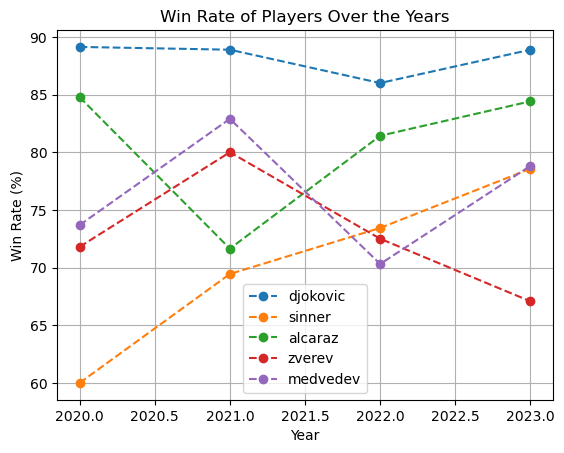

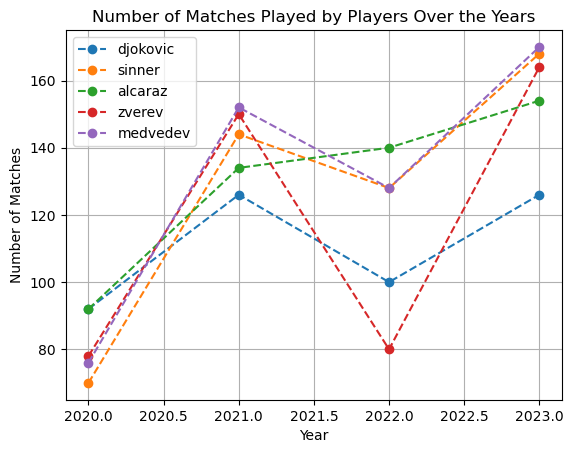

In [34]:
for p in players:
    plt.plot(years, stats[p]["winrates"], 'o--', label=p)
plt.xlabel("Year")
plt.ylabel("Win Rate (%)")
plt.title("Win Rate of Players Over the Years")
plt.legend()
plt.grid()
plt.show()

for p in players:
    plt.plot(years, stats[p]["n_matches"], 'o--', label=p)
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.title("Number of Matches Played by Players Over the Years")
plt.legend()
plt.grid()
plt.show()



### Example of a GET request to predict a Djokovic's match outcome

In [ ]:
url = "http://127.0.0.1:8000/predict"

params = {
    "opponent": "Casper Ruud",
    "tournament": "Monte Carlo Masters",
    "rank": 1,
    "surface": "Clay",
    "opponenrt_rank": 4,
    "tourney_date": 20240408,
    "best_of": 3,
    "opponent_hand": "R",
    "opponent_height": 183,
}

response = requests.get(url, params=params)
if response.status_code == 200:
    data = response.json()
    if data["prediction"] == 1:
        print(f"Djokovic will win with a probability of {data['probability']:.2f}")
    else:
        print(f"Djokovic will lose with a probability of {data['probability']:.2f}")
else:
    print(f"Errore!!: {response.status_code} - {response.text}")

{'prediction': 'no', 'probability': 0.9299999999999999}
